# Digit recognizer using Neural Networks [IN PROGRESS]

## Using the mnist dataset from kaggle to recognize digits

## Loading libraries

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

## Data preparation

In [2]:
data = pd.read_csv('train.csv')

In [3]:
print(data.shape)

(42000, 785)


In [4]:
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [5]:
images = data.iloc[:,1:].values
images = images.astype(np.float)

images = np.multiply(images,1.0/255.0)

In [6]:
images.shape

(42000, 784)

In [7]:
image_size = images.shape[1]
image_height = image_width = np.ceil(np.sqrt(image_size)).astype(np.uint8)
print("Image size : {0}".format(image_size))
print("Image height: {0} \nImage Width: {1}".format(image_height,image_width))

Image size : 784
Image height: 28 
Image Width: 28


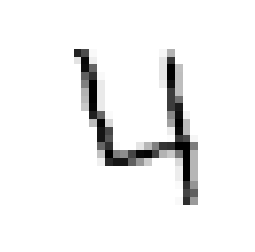

In [8]:
def display(img):
    one_image = img.reshape(image_width,image_height)
    plt.axis('off')
    plt.imshow(one_image,cmap=cm.binary)
display(images[3])

In [9]:
labels = data['label'].values
print('labels:{0}'.format(len(labels)))
print('labels[3]:{0}'.format(labels[3]))

labels:42000
labels[3]:4


In [11]:
labels_unique = np.unique(labels).shape[0]
print('labels_unique:{0}'.format(labels_unique))
print('labels_shape:{0}'.format(labels.shape))

labels_unique:10
labels_shape:(42000,)


## Converting class labels from scalar to one-hot vectors[understand]

In [23]:
def dense_to_hot(labels,labels_unique):
    labels_count = labels.shape[0]
    index_offset = np.arange(labels_count)*labels_unique
    print(index_offset)
    # a new array with 42000 rows and 10 columns with each element being zero
    labels_modified = np.zeros((labels_count,labels_unique))
    print(labels_modified.shape)
    # replacing nth digit with 1 for n label
    labels_modified.flat[index_offset+labels.ravel()]=1
    return labels_modified

labels_new = dense_to_hot(labels,labels_unique) 
print('labels_new[3]:{0}'.format(labels_new[3]))
print('labels_new_shape:{0}'.format(labels_new.shape))

[     0     10     20 ..., 419970 419980 419990]
(42000, 10)
labels_new[3]:[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
labels_new_shape:(42000, 10)


### The function dense_to_hot converts the label array to a new modified 2d array with 42000 rows and 10 columns.Every element is initially assigned 0.Each element n is defined by replacing 0 with 1 at the nth place.for instance:
### 0={1,0,0,0,0,0,0,0,0,0}
### 1={0,1,0,0,0,0,0,0,0,0}
### 2={0,0,1,0,0,0,0,0,0,0}
### .
### .
### 9={0,0,0,0,0,0,0,0,0,1}

## Splitting data into training and testing data

In [25]:
test_images = images[:2000]
test_labels = labels_new[:2000]

In [27]:
train_images = images[2000:]
train_labels = labels_new[2000:]

In [29]:
print('train_images:{0}'.format(train_images.shape))
print('train_labels:{0}'.format(train_labels.shape))

train_images:(40000, 784)
train_labels:(40000, 10)


In [31]:
print('test_images:{0}'.format(test_images.shape))
print('test_labels:{0}'.format(test_labels.shape))

test_images:(2000, 784)
test_labels:(2000, 10)


## Neural network